In [ ]:
from typing import List, Tuple, Dict, Any, Optional
from pandarallel import pandarallel
import os
import re
import sys
import json
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
from tqdm.auto import tqdm
tqdm.pandas()
pandarallel.initialize(progress_bar=True)

INFO: Pandarallel will run on 24 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [29]:
ANNOTATION_PATHS = [
    "../data/labeled_datasets/v001/v005_annotated.json",
    "../data/labeled_datasets/v001/v006_annotated.json"
]

N_CLUSTERS_RANGE = list(range(2, 11))

In [37]:
# Read JSON files and concatenate into a single dataframe
df_list = [pd.read_json(path) for path in ANNOTATION_PATHS]
df = pd.concat(df_list, ignore_index=True)
# Keep only rows with non-empty annotations
df = df[df['annotations'].apply(lambda x: len(x) > 0)]

# Assign the number of annotations to a variable
n_annotations = len(df)

# Print the number of annotations with an informative message
print(f"Number of annotations: {n_annotations}")


def extract_choice(row):
    annotations = row['annotations']
    if annotations:
        return annotations[0]['result'][0]['value']['choices'][0]
    return None


df['choice'] = df.apply(extract_choice, axis=1)
# Print all the keys of the dictionary in the data column line 1
attributes = list(df['data'].iloc[1].keys())
print(attributes)
for attribute in attributes:
    df[attribute] = df['data'].apply(lambda x: x.get(attribute, None))

print(df['choice'].unique())

df.head()

Number of annotations: 65
['exception_message', 'stack_trace', 'current_file', 'involved_functions', 'original_filepath_error', 'original_filepath_python', 'content_python_file', 'content_gates']
['Cluster 1 - Circuit Not Equivalent'
 'Cluster 2 - Invalid Parameters ISWAP'
 'Cluster 3 - PennyLane Scrambled Qubit Order'
 'Cluster 4 - PhasedX Gate print problem (Pytket)'
 'Cluster 5 - QCEC bug on DCX' 'Cluster 6 - CR redefined (BQSkit)'
 'Cluster 7 - Dagger Exporter (BQSKit)'
 'Cluster 8 - RYY Missing Def (BQSKit)']


,id,annotations,drafts,predictions,data,meta,created_at,updated_at,inner_id,total_annotations,...,comment_authors,choice,exception_message,stack_trace,current_file,involved_functions,original_filepath_error,original_filepath_python,content_python_file,content_gates
0,11,"[{'id': 1, 'completed_by': 1, 'result': [{'val...",[],[],{'exception_message': 'The circuits are not eq...,{},2024-10-29 14:20:40.493018+00:00,2024-10-29 14:27:02.035700+00:00,1,1,...,[],Cluster 1 - Circuit Not Equivalent,The circuits are not equivalent: /workspace/qi...,"Traceback (most recent call last):\n File ""/w...",qiskit_circuit_32q_10g_10533_36390b.py,"[compare_qasm_via_qcec, export_to_qasm_with_pe...",program_bank/v005/2024_10_22__22_32__qiskit/qi...,program_bank/v005/2024_10_22__22_32__qiskit/qi...,# Section: Prologue\nfrom qiskit import Quantu...,"qc.cs(qr[18], qr[1])\nqc.rzz(3.406215, qr[22],..."
1,12,"[{'id': 2, 'completed_by': 1, 'result': [{'val...",[],[],{'exception_message': 'Gate has an invalid num...,{},2024-10-29 14:20:40.503690+00:00,2024-10-29 14:29:56.139913+00:00,2,1,...,[],Cluster 2 - Invalid Parameters ISWAP,Gate has an invalid number of parameters,"Traceback (most recent call last):\n File ""/w...",qiskit_circuit_32q_10g_1166_ace9a0.py,"[import_from_qasm_with_pytket, export_to_qasm_...",program_bank/v005/2024_10_22__14_17__qiskit/qi...,program_bank/v005/2024_10_22__14_17__qiskit/qi...,# Section: Prologue\nfrom qiskit import Quantu...,"qc.p(1.930156, qr[11])\nqc.cswap(qr[24], qr[10..."
2,13,"[{'id': 3, 'completed_by': 1, 'result': [{'val...",[],[],{'exception_message': 'The circuits are not eq...,{},2024-10-29 14:20:40.511692+00:00,2024-10-29 14:34:06.794691+00:00,3,1,...,[],Cluster 1 - Circuit Not Equivalent,The circuits are not equivalent: /workspace/qi...,"Traceback (most recent call last):\n File ""/w...",qiskit_circuit_32q_10g_26920_4d663b.py,"[compare_qasm_via_qcec, export_to_qasm_with_py...",program_bank/v005/2024_10_22__22_32__qiskit/qi...,program_bank/v005/2024_10_22__22_32__qiskit/qi...,# Section: Prologue\nfrom qiskit import Quantu...,"qc.t(qr[8])\nqc.ry(0.487047, qr[15])\nqc.sdg(q..."
3,14,"[{'id': 4, 'completed_by': 1, 'result': [{'val...",[],[],{'exception_message': 'The circuits are not eq...,{},2024-10-29 14:20:40.519700+00:00,2024-10-29 14:37:44.162674+00:00,4,1,...,[],Cluster 3 - PennyLane Scrambled Qubit Order,The circuits are not equivalent: /workspace/qi...,"Traceback (most recent call last):\n File ""/w...",qiskit_circuit_32q_10g_30096_5629a8.py,"[compare_qasm_via_qcec, export_to_qasm_with_pe...",program_bank/v005/2024_10_22__22_32__qiskit/qi...,program_bank/v005/2024_10_22__22_32__qiskit/qi...,# Section: Prologue\nfrom qiskit import Quantu...,"qc.t(qr[18])\nqc.s(qr[6])\nqc.iswap(qr[2], qr[..."
4,15,"[{'id': 5, 'completed_by': 1, 'result': [{'val...",[],[],{'exception_message': 'The circuits are not eq...,{},2024-10-29 14:20:40.527635+00:00,2024-10-29 14:37:52.418543+00:00,5,1,...,[],Cluster 3 - PennyLane Scrambled Qubit Order,The circuits are not equivalent: /workspace/qi...,"Traceback (most recent call last):\n File ""/w...",qiskit_circuit_32q_10g_30686_f57be6.py,"[compare_qasm_via_qcec, export_to_qasm_with_pe...",program_bank/v005/2024_10_22__22_32__qiskit/qi...,program_bank/v005/2024_10_22__22_32__qiskit/qi...,# Section: Prologue\nfrom qiskit import Quantu...,"qc.csdg(qr[1], qr[20])\nqc.sxdg(qr[20])\nqc.cc..."


## Clustering with Exception Message Only

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Vectorize the exception_message column using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['exception_message'])

# Apply KMeans clustering for each k and create new columns with the respective labels
for k in N_CLUSTERS_RANGE:
    kmeans = KMeans(n_clusters=k, random_state=42)
    df[f'k_means_{k}'] = kmeans.fit_predict(X)

df.head()

,id,annotations,drafts,predictions,data,meta,created_at,updated_at,inner_id,total_annotations,...,content_gates,k_means_2,k_means_3,k_means_4,k_means_5,k_means_6,k_means_7,k_means_8,k_means_9,k_means_10
0,11,"[{'id': 1, 'completed_by': 1, 'result': [{'val...",[],[],{'exception_message': 'The circuits are not eq...,{},2024-10-29 14:20:40.493018+00:00,2024-10-29 14:27:02.035700+00:00,1,1,...,"qc.cs(qr[18], qr[1])\nqc.rzz(3.406215, qr[22],...",0,0,0,0,0,0,0,0,0
1,12,"[{'id': 2, 'completed_by': 1, 'result': [{'val...",[],[],{'exception_message': 'Gate has an invalid num...,{},2024-10-29 14:20:40.503690+00:00,2024-10-29 14:29:56.139913+00:00,2,1,...,"qc.p(1.930156, qr[11])\nqc.cswap(qr[24], qr[10...",0,2,2,4,4,4,3,3,3
2,13,"[{'id': 3, 'completed_by': 1, 'result': [{'val...",[],[],{'exception_message': 'The circuits are not eq...,{},2024-10-29 14:20:40.511692+00:00,2024-10-29 14:34:06.794691+00:00,3,1,...,"qc.t(qr[8])\nqc.ry(0.487047, qr[15])\nqc.sdg(q...",0,0,0,0,0,0,0,0,0
3,14,"[{'id': 4, 'completed_by': 1, 'result': [{'val...",[],[],{'exception_message': 'The circuits are not eq...,{},2024-10-29 14:20:40.519700+00:00,2024-10-29 14:37:44.162674+00:00,4,1,...,"qc.t(qr[18])\nqc.s(qr[6])\nqc.iswap(qr[2], qr[...",0,0,0,0,0,0,0,0,0
4,15,"[{'id': 5, 'completed_by': 1, 'result': [{'val...",[],[],{'exception_message': 'The circuits are not eq...,{},2024-10-29 14:20:40.527635+00:00,2024-10-29 14:37:52.418543+00:00,5,1,...,"qc.csdg(qr[1], qr[20])\nqc.sxdg(qr[20])\nqc.cc...",0,0,0,0,0,0,0,0,0


## Clustering with Message and Content Gates

In [33]:
# Combine exception_message and content_gates into a single text column
df['combined_text'] = df['exception_message'] + " " + df['content_gates']

# Vectorize the combined_text column using TF-IDF
X_combined = vectorizer.fit_transform(df['combined_text'])

# Apply KMeans clustering for each k and create new columns with the respective labels
for k in N_CLUSTERS_RANGE:
    kmeans = KMeans(n_clusters=k, random_state=42)
    df[f'k_means_combined_{k}'] = kmeans.fit_predict(X_combined)

df.head()

,id,annotations,drafts,predictions,data,meta,created_at,updated_at,inner_id,total_annotations,...,combined_text,k_means_combined_2,k_means_combined_3,k_means_combined_4,k_means_combined_5,k_means_combined_6,k_means_combined_7,k_means_combined_8,k_means_combined_9,k_means_combined_10
0,11,"[{'id': 1, 'completed_by': 1, 'result': [{'val...",[],[],{'exception_message': 'The circuits are not eq...,{},2024-10-29 14:20:40.493018+00:00,2024-10-29 14:27:02.035700+00:00,1,1,...,The circuits are not equivalent: /workspace/qi...,0,1,1,1,1,1,1,1,1
1,12,"[{'id': 2, 'completed_by': 1, 'result': [{'val...",[],[],{'exception_message': 'Gate has an invalid num...,{},2024-10-29 14:20:40.503690+00:00,2024-10-29 14:29:56.139913+00:00,2,1,...,Gate has an invalid number of parameters qc.p(...,1,2,2,4,4,4,6,6,9
2,13,"[{'id': 3, 'completed_by': 1, 'result': [{'val...",[],[],{'exception_message': 'The circuits are not eq...,{},2024-10-29 14:20:40.511692+00:00,2024-10-29 14:34:06.794691+00:00,3,1,...,The circuits are not equivalent: /workspace/qi...,0,1,1,1,1,6,4,4,4
3,14,"[{'id': 4, 'completed_by': 1, 'result': [{'val...",[],[],{'exception_message': 'The circuits are not eq...,{},2024-10-29 14:20:40.519700+00:00,2024-10-29 14:37:44.162674+00:00,4,1,...,The circuits are not equivalent: /workspace/qi...,0,1,1,1,1,1,4,4,4
4,15,"[{'id': 5, 'completed_by': 1, 'result': [{'val...",[],[],{'exception_message': 'The circuits are not eq...,{},2024-10-29 14:20:40.527635+00:00,2024-10-29 14:37:52.418543+00:00,5,1,...,The circuits are not equivalent: /workspace/qi...,0,0,0,0,0,0,4,4,4


## Explore All Combinations

In [ ]:
from itertools import combinations

# List of attributes
attributes = [
    'exception_message', 'stack_trace', 'current_file', 'involved_functions',
    'original_filepath_error', 'original_filepath_python',
    'content_python_file', 'content_gates']

# Dictionary to store the mapping from ID to attribute combinations
attribute_combinations = {}

# Generate combinations of attributes and map them to numeric IDs
id_counter = 1
for r in range(1, len(attributes) + 1):
    for combo in combinations(attributes, r):
        attribute_combinations[id_counter] = list(combo)
        id_counter += 1

# Print the attribute combinations mapping
for id, combo in attribute_combinations.items():
    print(f"ID: {id}, Combination: {combo}")

ID: 1, Combination: ['exception_message']
ID: 2, Combination: ['stack_trace']
ID: 3, Combination: ['current_file']
ID: 4, Combination: ['involved_functions']
ID: 5, Combination: ['original_filepath_error']
ID: 6, Combination: ['original_filepath_python']
ID: 7, Combination: ['content_python_file']
ID: 8, Combination: ['content_gates']
ID: 9, Combination: ['exception_message', 'stack_trace']
ID: 10, Combination: ['exception_message', 'current_file']
ID: 11, Combination: ['exception_message', 'involved_functions']
ID: 12, Combination: ['exception_message', 'original_filepath_error']
ID: 13, Combination: ['exception_message', 'original_filepath_python']
ID: 14, Combination: ['exception_message', 'content_python_file']
ID: 15, Combination: ['exception_message', 'content_gates']
ID: 16, Combination: ['stack_trace', 'current_file']
ID: 17, Combination: ['stack_trace', 'involved_functions']
ID: 18, Combination: ['stack_trace', 'original_filepath_error']
ID: 19, Combination: ['stack_trace', 'o

In [ ]:
# Initialize a dictionary to store the Adjusted Rand Scores for each combination
adjusted_rand_scores_combinations = {}

# Iterate over each combination of attributes
for combo_id, combo in attribute_combinations.items():

    # Combine the text for the current combination of attributes
    try:
        df['combined_text'] = df[combo].apply(
            lambda row: ' '.join(row.values.astype(str)), axis=1)
    except Exception as e:
        print(f"Skipping combination ID: {combo_id} due to an error: {e}")
        continue

    # Vectorize the combined_text column using TF-IDF
    X_combined = vectorizer.fit_transform(df['combined_text'])

    # Initialize a list to store the Adjusted Rand Scores for the current combination
    ars_list = []

    # Apply KMeans clustering for each k and compute the Adjusted Rand Score
    for k in N_CLUSTERS_RANGE:
        kmeans = KMeans(n_clusters=k, random_state=42)
        df[f'k_means_combined_{combo_id}_{k}'] = kmeans.fit_predict(X_combined)
        score_combined = adjusted_rand_score(
            df['choice'], df[f'k_means_combined_{combo_id}_{k}'])
        ars_list.append(score_combined)

    # Store the list of Adjusted Rand Scores in the dictionary with the combo_id as the key
    adjusted_rand_scores_combinations[combo_id] = ars_list

# Print the Adjusted Rand Scores for each combination
for combo_id, ars_list in adjusted_rand_scores_combinations.items():
    print(f"Combination ID: {combo_id}, Adjusted Rand Scores: {ars_list}")

Skipping combination ID: 4 due to an error: setting an array element with a sequence
Skipping combination ID: 11 due to an error: setting an array element with a sequence


/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'k_means_combined_{combo_id}_{k}'] = kmeans.fit_predict(X_combined)
/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'k_means_combined_{combo_id}_{k}'] = kmeans.fit_predict(X_combined)
/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at

Skipping combination ID: 17 due to an error: setting an array element with a sequence


/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'k_means_combined_{combo_id}_{k}'] = kmeans.fit_predict(X_combined)
/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'k_means_combined_{combo_id}_{k}'] = kmeans.fit_predict(X_combined)
/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at

Skipping combination ID: 22 due to an error: setting an array element with a sequence


/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'k_means_combined_{combo_id}_{k}'] = kmeans.fit_predict(X_combined)
/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'k_means_combined_{combo_id}_{k}'] = kmeans.fit_predict(X_combined)
/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at

Skipping combination ID: 27 due to an error: setting an array element with a sequence
Skipping combination ID: 28 due to an error: setting an array element with a sequence
Skipping combination ID: 29 due to an error: setting an array element with a sequence
Skipping combination ID: 30 due to an error: setting an array element with a sequence


/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'k_means_combined_{combo_id}_{k}'] = kmeans.fit_predict(X_combined)
/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'k_means_combined_{combo_id}_{k}'] = kmeans.fit_predict(X_combined)
/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at

Skipping combination ID: 38 due to an error: setting an array element with a sequence


/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'k_means_combined_{combo_id}_{k}'] = kmeans.fit_predict(X_combined)
/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'k_means_combined_{combo_id}_{k}'] = kmeans.fit_predict(X_combined)
/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at

Skipping combination ID: 43 due to an error: setting an array element with a sequence


/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'k_means_combined_{combo_id}_{k}'] = kmeans.fit_predict(X_combined)
/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'k_means_combined_{combo_id}_{k}'] = kmeans.fit_predict(X_combined)
/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at

Skipping combination ID: 48 due to an error: setting an array element with a sequence
Skipping combination ID: 49 due to an error: setting an array element with a sequence
Skipping combination ID: 50 due to an error: setting an array element with a sequence
Skipping combination ID: 51 due to an error: setting an array element with a sequence


/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'k_means_combined_{combo_id}_{k}'] = kmeans.fit_predict(X_combined)
/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'k_means_combined_{combo_id}_{k}'] = kmeans.fit_predict(X_combined)
/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at

Skipping combination ID: 58 due to an error: setting an array element with a sequence


/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'k_means_combined_{combo_id}_{k}'] = kmeans.fit_predict(X_combined)
/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'k_means_combined_{combo_id}_{k}'] = kmeans.fit_predict(X_combined)
/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at

Skipping combination ID: 63 due to an error: setting an array element with a sequence
Skipping combination ID: 64 due to an error: setting an array element with a sequence
Skipping combination ID: 65 due to an error: setting an array element with a sequence
Skipping combination ID: 66 due to an error: setting an array element with a sequence


/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'k_means_combined_{combo_id}_{k}'] = kmeans.fit_predict(X_combined)
/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'k_means_combined_{combo_id}_{k}'] = kmeans.fit_predict(X_combined)
/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at

Skipping combination ID: 73 due to an error: setting an array element with a sequence
Skipping combination ID: 74 due to an error: setting an array element with a sequence
Skipping combination ID: 75 due to an error: setting an array element with a sequence
Skipping combination ID: 76 due to an error: setting an array element with a sequence


/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'k_means_combined_{combo_id}_{k}'] = kmeans.fit_predict(X_combined)
/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'k_means_combined_{combo_id}_{k}'] = kmeans.fit_predict(X_combined)
/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at

Skipping combination ID: 83 due to an error: setting an array element with a sequence
Skipping combination ID: 84 due to an error: setting an array element with a sequence
Skipping combination ID: 85 due to an error: setting an array element with a sequence
Skipping combination ID: 86 due to an error: setting an array element with a sequence
Skipping combination ID: 87 due to an error: setting an array element with a sequence
Skipping combination ID: 88 due to an error: setting an array element with a sequence


/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'k_means_combined_{combo_id}_{k}'] = kmeans.fit_predict(X_combined)
/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'k_means_combined_{combo_id}_{k}'] = kmeans.fit_predict(X_combined)
/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at

Skipping combination ID: 93 due to an error: setting an array element with a sequence


/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'k_means_combined_{combo_id}_{k}'] = kmeans.fit_predict(X_combined)
/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'k_means_combined_{combo_id}_{k}'] = kmeans.fit_predict(X_combined)
/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at

Skipping combination ID: 98 due to an error: setting an array element with a sequence
Skipping combination ID: 99 due to an error: setting an array element with a sequence
Skipping combination ID: 100 due to an error: setting an array element with a sequence
Skipping combination ID: 101 due to an error: setting an array element with a sequence


/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'k_means_combined_{combo_id}_{k}'] = kmeans.fit_predict(X_combined)
/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'k_means_combined_{combo_id}_{k}'] = kmeans.fit_predict(X_combined)
/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at

Skipping combination ID: 108 due to an error: setting an array element with a sequence
Skipping combination ID: 109 due to an error: setting an array element with a sequence
Skipping combination ID: 110 due to an error: setting an array element with a sequence
Skipping combination ID: 111 due to an error: setting an array element with a sequence


/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'k_means_combined_{combo_id}_{k}'] = kmeans.fit_predict(X_combined)
/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'k_means_combined_{combo_id}_{k}'] = kmeans.fit_predict(X_combined)
/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at

Skipping combination ID: 118 due to an error: setting an array element with a sequence
Skipping combination ID: 119 due to an error: setting an array element with a sequence
Skipping combination ID: 120 due to an error: setting an array element with a sequence
Skipping combination ID: 121 due to an error: setting an array element with a sequence
Skipping combination ID: 122 due to an error: setting an array element with a sequence
Skipping combination ID: 123 due to an error: setting an array element with a sequence


/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'k_means_combined_{combo_id}_{k}'] = kmeans.fit_predict(X_combined)
/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'k_means_combined_{combo_id}_{k}'] = kmeans.fit_predict(X_combined)
/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at

Skipping combination ID: 128 due to an error: setting an array element with a sequence
Skipping combination ID: 129 due to an error: setting an array element with a sequence
Skipping combination ID: 130 due to an error: setting an array element with a sequence
Skipping combination ID: 131 due to an error: setting an array element with a sequence


/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'k_means_combined_{combo_id}_{k}'] = kmeans.fit_predict(X_combined)
/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'k_means_combined_{combo_id}_{k}'] = kmeans.fit_predict(X_combined)
/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at

Skipping combination ID: 138 due to an error: setting an array element with a sequence
Skipping combination ID: 139 due to an error: setting an array element with a sequence
Skipping combination ID: 140 due to an error: setting an array element with a sequence
Skipping combination ID: 141 due to an error: setting an array element with a sequence
Skipping combination ID: 142 due to an error: setting an array element with a sequence
Skipping combination ID: 143 due to an error: setting an array element with a sequence


/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'k_means_combined_{combo_id}_{k}'] = kmeans.fit_predict(X_combined)
/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'k_means_combined_{combo_id}_{k}'] = kmeans.fit_predict(X_combined)
/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at

Skipping combination ID: 148 due to an error: setting an array element with a sequence
Skipping combination ID: 149 due to an error: setting an array element with a sequence
Skipping combination ID: 150 due to an error: setting an array element with a sequence
Skipping combination ID: 151 due to an error: setting an array element with a sequence
Skipping combination ID: 152 due to an error: setting an array element with a sequence
Skipping combination ID: 153 due to an error: setting an array element with a sequence


/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'k_means_combined_{combo_id}_{k}'] = kmeans.fit_predict(X_combined)
/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'k_means_combined_{combo_id}_{k}'] = kmeans.fit_predict(X_combined)
/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at

Skipping combination ID: 158 due to an error: setting an array element with a sequence
Skipping combination ID: 159 due to an error: setting an array element with a sequence
Skipping combination ID: 160 due to an error: setting an array element with a sequence
Skipping combination ID: 161 due to an error: setting an array element with a sequence
Skipping combination ID: 163 due to an error: setting an array element with a sequence
Skipping combination ID: 164 due to an error: setting an array element with a sequence
Skipping combination ID: 165 due to an error: setting an array element with a sequence
Skipping combination ID: 166 due to an error: setting an array element with a sequence


/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'k_means_combined_{combo_id}_{k}'] = kmeans.fit_predict(X_combined)
/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'k_means_combined_{combo_id}_{k}'] = kmeans.fit_predict(X_combined)
/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at

Skipping combination ID: 173 due to an error: setting an array element with a sequence
Skipping combination ID: 174 due to an error: setting an array element with a sequence
Skipping combination ID: 175 due to an error: setting an array element with a sequence
Skipping combination ID: 176 due to an error: setting an array element with a sequence
Skipping combination ID: 177 due to an error: setting an array element with a sequence
Skipping combination ID: 178 due to an error: setting an array element with a sequence


/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'k_means_combined_{combo_id}_{k}'] = kmeans.fit_predict(X_combined)
/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'k_means_combined_{combo_id}_{k}'] = kmeans.fit_predict(X_combined)
/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at

Skipping combination ID: 183 due to an error: setting an array element with a sequence
Skipping combination ID: 184 due to an error: setting an array element with a sequence
Skipping combination ID: 185 due to an error: setting an array element with a sequence
Skipping combination ID: 186 due to an error: setting an array element with a sequence
Skipping combination ID: 187 due to an error: setting an array element with a sequence
Skipping combination ID: 188 due to an error: setting an array element with a sequence


/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'k_means_combined_{combo_id}_{k}'] = kmeans.fit_predict(X_combined)
/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'k_means_combined_{combo_id}_{k}'] = kmeans.fit_predict(X_combined)
/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at

Skipping combination ID: 193 due to an error: setting an array element with a sequence
Skipping combination ID: 194 due to an error: setting an array element with a sequence
Skipping combination ID: 195 due to an error: setting an array element with a sequence
Skipping combination ID: 196 due to an error: setting an array element with a sequence
Skipping combination ID: 198 due to an error: setting an array element with a sequence
Skipping combination ID: 199 due to an error: setting an array element with a sequence
Skipping combination ID: 200 due to an error: setting an array element with a sequence
Skipping combination ID: 201 due to an error: setting an array element with a sequence
Skipping combination ID: 202 due to an error: setting an array element with a sequence
Skipping combination ID: 203 due to an error: setting an array element with a sequence


/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'k_means_combined_{combo_id}_{k}'] = kmeans.fit_predict(X_combined)
/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'k_means_combined_{combo_id}_{k}'] = kmeans.fit_predict(X_combined)
/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at

Skipping combination ID: 208 due to an error: setting an array element with a sequence
Skipping combination ID: 209 due to an error: setting an array element with a sequence
Skipping combination ID: 210 due to an error: setting an array element with a sequence
Skipping combination ID: 211 due to an error: setting an array element with a sequence
Skipping combination ID: 213 due to an error: setting an array element with a sequence
Skipping combination ID: 214 due to an error: setting an array element with a sequence
Skipping combination ID: 215 due to an error: setting an array element with a sequence
Skipping combination ID: 216 due to an error: setting an array element with a sequence


/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'k_means_combined_{combo_id}_{k}'] = kmeans.fit_predict(X_combined)
/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'k_means_combined_{combo_id}_{k}'] = kmeans.fit_predict(X_combined)
/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at

Skipping combination ID: 218 due to an error: setting an array element with a sequence
Skipping combination ID: 219 due to an error: setting an array element with a sequence
Skipping combination ID: 220 due to an error: setting an array element with a sequence
Skipping combination ID: 221 due to an error: setting an array element with a sequence
Skipping combination ID: 222 due to an error: setting an array element with a sequence
Skipping combination ID: 223 due to an error: setting an array element with a sequence
Skipping combination ID: 224 due to an error: setting an array element with a sequence


/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'k_means_combined_{combo_id}_{k}'] = kmeans.fit_predict(X_combined)
/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'k_means_combined_{combo_id}_{k}'] = kmeans.fit_predict(X_combined)
/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at

Skipping combination ID: 229 due to an error: setting an array element with a sequence
Skipping combination ID: 230 due to an error: setting an array element with a sequence
Skipping combination ID: 231 due to an error: setting an array element with a sequence
Skipping combination ID: 232 due to an error: setting an array element with a sequence
Skipping combination ID: 234 due to an error: setting an array element with a sequence
Skipping combination ID: 235 due to an error: setting an array element with a sequence
Skipping combination ID: 236 due to an error: setting an array element with a sequence
Skipping combination ID: 237 due to an error: setting an array element with a sequence


/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'k_means_combined_{combo_id}_{k}'] = kmeans.fit_predict(X_combined)
/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'k_means_combined_{combo_id}_{k}'] = kmeans.fit_predict(X_combined)
/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at

Skipping combination ID: 239 due to an error: setting an array element with a sequence
Skipping combination ID: 240 due to an error: setting an array element with a sequence
Skipping combination ID: 241 due to an error: setting an array element with a sequence
Skipping combination ID: 242 due to an error: setting an array element with a sequence
Skipping combination ID: 243 due to an error: setting an array element with a sequence
Skipping combination ID: 245 due to an error: setting an array element with a sequence
Skipping combination ID: 246 due to an error: setting an array element with a sequence
Skipping combination ID: 247 due to an error: setting an array element with a sequence
Skipping combination ID: 248 due to an error: setting an array element with a sequence
Skipping combination ID: 249 due to an error: setting an array element with a sequence
Skipping combination ID: 250 due to an error: setting an array element with a sequence


/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'k_means_combined_{combo_id}_{k}'] = kmeans.fit_predict(X_combined)
/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'k_means_combined_{combo_id}_{k}'] = kmeans.fit_predict(X_combined)
/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at

Skipping combination ID: 252 due to an error: setting an array element with a sequence
Skipping combination ID: 253 due to an error: setting an array element with a sequence
Skipping combination ID: 254 due to an error: setting an array element with a sequence
Skipping combination ID: 255 due to an error: setting an array element with a sequence
Combination ID: 1, Adjusted Rand Scores: [0.35054617026911267, 0.7720540375393525, 0.7756152874179311, 0.8097314050799601, 0.7754651729369774, 0.7414719420076019, 0.7327264921259128, 0.6999165981847361, 0.7066734248411966]
Combination ID: 2, Adjusted Rand Scores: [0.6597704510563638, 0.7803385495950801, 0.7728063595660277, 0.8126089425958205, 0.778345681606855, 0.7751627512316721, 0.6544329291660891, 0.6215187498324711, 0.6444536810931574]
Combination ID: 3, Adjusted Rand Scores: [0.018253293179153543, 0.0031590440939578725, -0.01599002527698936, 0.0012154679551627376, -0.018040099258605204, -0.03680525846771142, 0.023167420530906344, 0.0528985

/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'k_means_combined_{combo_id}_{k}'] = kmeans.fit_predict(X_combined)
/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'k_means_combined_{combo_id}_{k}'] = kmeans.fit_predict(X_combined)
/tmp/ipykernel_1264157/964610805.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at

<Figure size 1200x800 with 0 Axes>

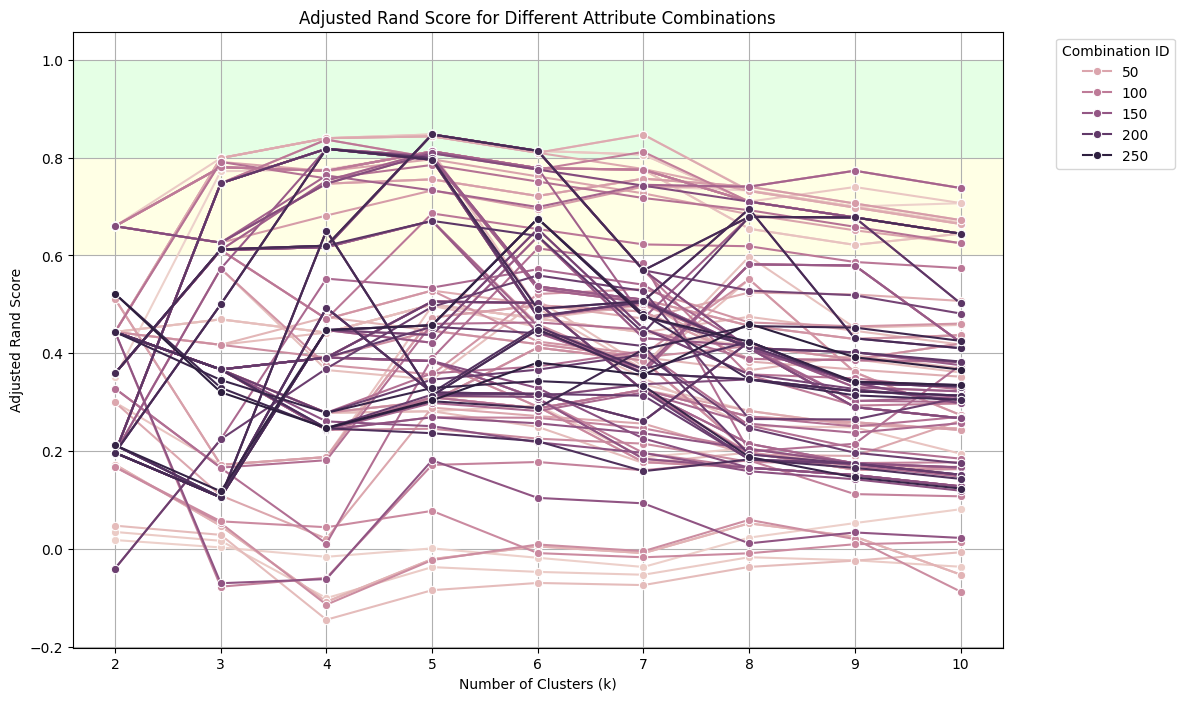

In [75]:
import pandas as pd

# Convert the dictionary to a DataFrame for easier plotting

# Create a DataFrame from the dictionary
df_ars = pd.DataFrame.from_dict(
    adjusted_rand_scores_combinations, orient='index',
    columns=N_CLUSTERS_RANGE)

# Reset the index to get the combination IDs as a column
df_ars.reset_index(inplace=True)
df_ars.rename(columns={'index': 'combo_id'}, inplace=True)


# Melt the DataFrame to long format for seaborn
df_ars_melted = df_ars.melt(id_vars='combo_id', var_name='k', value_name='ars')

# Plot the data using seaborn
plt.figure(figsize=(12, 8))
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(data=df_ars_melted, x='k', y='ars',
             hue='combo_id', marker='o', ax=ax)
ax.set_xlabel('Number of Clusters (k)')
ax.set_ylabel('Adjusted Rand Score')
ax.set_title('Adjusted Rand Score for Different Attribute Combinations')
ax.legend(title='Combination ID', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.axhspan(0.6, 0.8, facecolor='yellow', alpha=0.1)
ax.axhspan(0.8, 1, facecolor='lime', alpha=0.1)
ax.grid(True)

Combination ID: 10.0, Average ARS: 0.7664841420684134
Attribute Combination: ['exception_message', 'current_file']
--------------------------------------------------
Combination ID: 13.0, Average ARS: 0.7451271179498968
Attribute Combination: ['exception_message', 'original_filepath_python']
--------------------------------------------------
Combination ID: 44.0, Average ARS: 0.741792541699165
Attribute Combination: ['exception_message', 'current_file', 'original_filepath_error']
--------------------------------------------------
Combination ID: 9.0, Average ARS: 0.7345679518862245
Attribute Combination: ['exception_message', 'stack_trace']
--------------------------------------------------
Combination ID: 37.0, Average ARS: 0.7345679518862245
Attribute Combination: ['exception_message', 'stack_trace', 'current_file']
--------------------------------------------------
--------------------------------------------------
Combination ID: 2.0, Best ARS Values: [0.65977045 0.78033855 0.77280

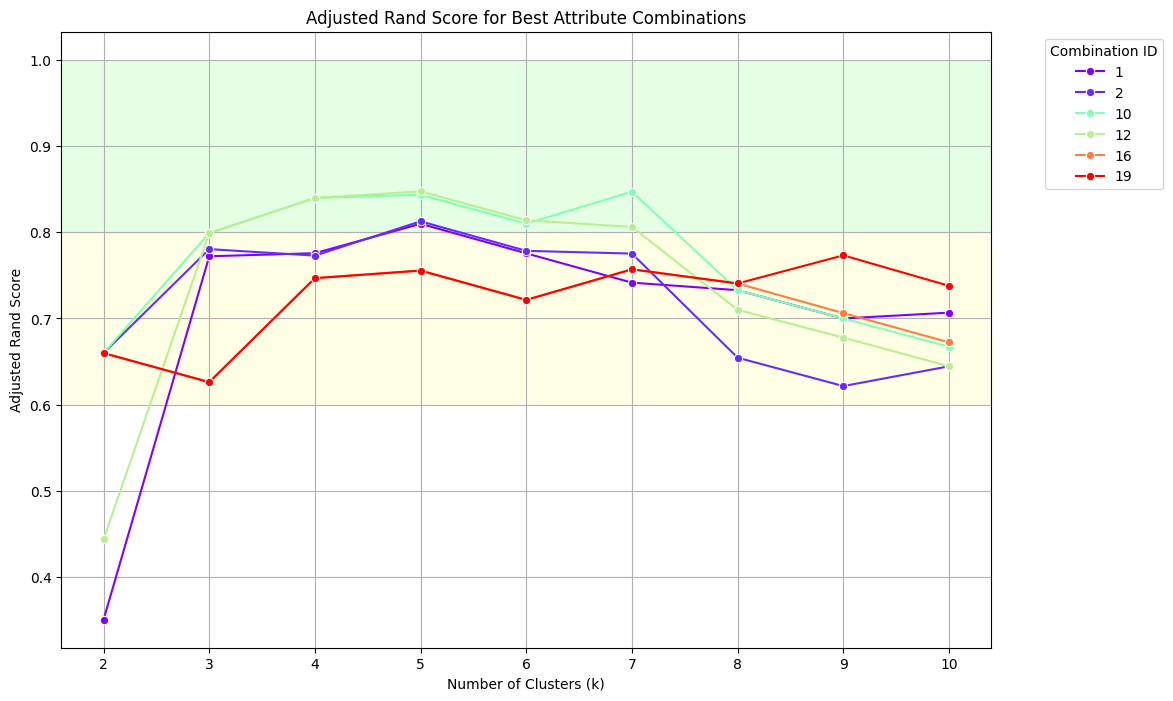

In [74]:
df_best_combos = df_ars.loc[df_ars.iloc[:, 1:].idxmax()]
# remove duplicates combo ids
df_best_combos = df_best_combos.drop_duplicates(
    subset=N_CLUSTERS_RANGE, keep='first')
df_best_combos

# add the line with id 1
df_best_combos = pd.concat([df_best_combos, df_ars.loc[0:0]])


def get_top_k_combos(df_args: pd.DataFrame,
                     attribute_combinations: Dict[int, List[str]],
                     k: int) -> None:
    # Calculate the average ARS for each combination
    df = df_args.copy()
    df['average_ars'] = df.iloc[:, 1:].mean(axis=1)

    # Get the top k combinations with the highest average ARS
    top_k_combos = df.nlargest(k, 'average_ars')

    # Print the top k combinations
    for _, row in top_k_combos.iterrows():
        combo_id = row['combo_id']
        average_ars = row['average_ars']
        print(f"Combination ID: {combo_id}, Average ARS: {average_ars}")
        print(
            f"Attribute Combination: {attribute_combinations[int(combo_id)]}")
        print("-" * 50)


# Example usage
get_top_k_combos(df_ars, attribute_combinations, 5)

# print the values of the best combinations
for index, row in df_best_combos.iterrows():
    combo_id = row['combo_id']
    ars_values = row.iloc[1:].values
    print("-" * 50)
    print(f"Combination ID: {combo_id}, Best ARS Values: {ars_values}")
    print(f"Attribute Combination: {attribute_combinations[int(combo_id)]}")

# Melt the DataFrame to long format for seaborn
df_best_combos_melted = df_best_combos.melt(
    id_vars='combo_id', var_name='k', value_name='ars')

# Plot the data using seaborn
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(data=df_best_combos_melted, x='k', y='ars',
             hue='combo_id', marker='o', palette='rainbow', ax=ax)
ax.set_xlabel('Number of Clusters (k)')
ax.set_ylabel('Adjusted Rand Score')
ax.set_title('Adjusted Rand Score for Best Attribute Combinations')
ax.axhspan(0.6, 0.8, facecolor='yellow', alpha=0.1)
ax.axhspan(0.8, 1, facecolor='lime', alpha=0.1)
ax.legend(title='Combination ID', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True)
plt.show()

In [ ]:
k = 5
for i, row in df.tail(k).iterrows():
    print(f"Exception: {row['exception_message']}")
    print(f"Current File: {row['current_file']}")
    print("---")

Exception: Cannot print command of type: PhasedX(0.5, 0)
Current File: qiskit_circuit_32q_10g_10898_7d6b10.py
---
Exception: Could not import first circuit: <input>:5:1:
Identifier 'cr' already declared.
Current File: qiskit_circuit_32q_10g_10979_ab7651.py
---
Exception: Gate has an invalid number of parameters
Current File: qiskit_circuit_32q_10g_11019_7190f3.py
---
Exception: "<input>:5,5: 'cr' is already defined"
Current File: qiskit_circuit_32q_10g_11096_c68bbf.py
---
Exception: "<input>:14,5: 'cr' is already defined"
Current File: qiskit_circuit_32q_10g_1114_cc3553.py
---


## Compute Agreement

In [82]:
df_ars

,combo_id,2,3,4,5,6,7,8,9,10
0,1,0.350546,0.772054,0.775615,0.809731,0.775465,0.741472,0.732726,0.699917,0.706673
1,2,0.659770,0.780339,0.772806,0.812609,0.778346,0.775163,0.654433,0.621519,0.644454
2,3,0.018253,0.003159,-0.015990,0.001215,-0.018040,-0.036805,0.023167,0.052899,0.081219
3,5,0.443594,0.469332,0.442227,0.499616,0.470956,0.442704,0.414903,0.387595,0.419856
4,6,0.443594,0.469332,0.442227,0.499616,0.470956,0.442704,0.414903,0.387595,0.419856
...,...,...,...,...,...,...,...,...,...,...
122,228,0.196644,0.105552,0.447417,0.457276,0.675439,0.479935,0.346706,0.313969,0.304944
123,233,0.521522,0.329579,0.246104,0.301965,0.288256,0.408003,0.455564,0.452431,0.425372
124,238,0.443594,0.345389,0.278300,0.329060,0.343154,0.333609,0.188007,0.146298,0.123572
125,244,0.212227,0.117822,0.447417,0.457276,0.675439,0.475148,0.423541,0.341823,0.334952


Found combination: ['exception_message'] with ID: 1
Found combination: ['exception_message', 'content_gates'] with ID: 15


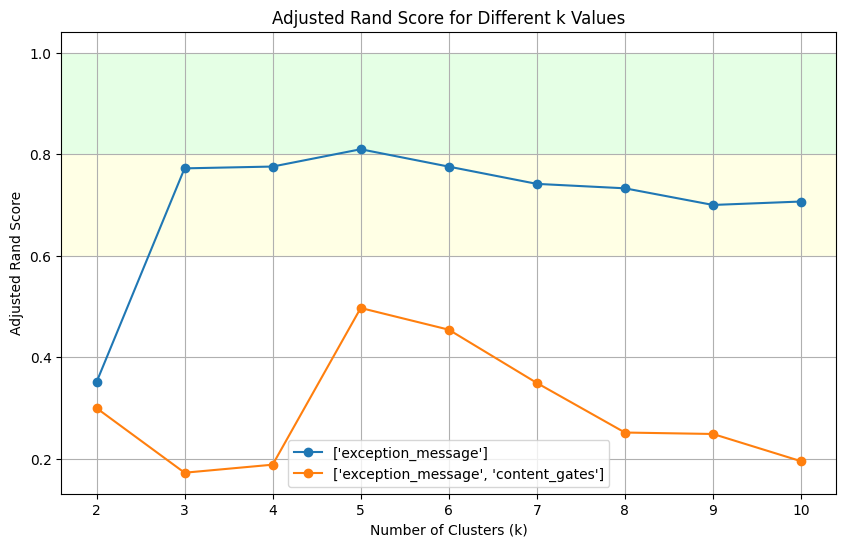

In [ ]:
from sklearn.metrics import adjusted_rand_score

# Get the ID for 'exception_message'


def get_combo_id(
        attribute_combinations: Dict[int, List[str]],
        attributes: List[str]) -> Optional[int]:
    for key, value in attribute_combinations.items():
        if set(value) == set(attributes):
            print(f"Found combination: {value} with ID: {key}")
            return key
    return None


# Plot the scores
fig, ax = plt.subplots(figsize=(10, 6))
for set_content in [
    ["exception_message"],
        ["exception_message", "content_gates"]]:
    combo_id = get_combo_id(attribute_combinations, set_content)
    scores = df_ars[df_ars['combo_id'] == combo_id].values[0][1:]
    ax.plot(N_CLUSTERS_RANGE, scores, marker='o', label=str(set_content))
ax.set_xlabel('Number of Clusters (k)')
ax.set_ylabel('Adjusted Rand Score')
ax.set_title('Adjusted Rand Score for Different k Values')
ax.legend()
ax.axhspan(0.6, 0.8, facecolor='yellow', alpha=0.1)
ax.axhspan(0.8, 1, facecolor='lime', alpha=0.1)
ax.grid(True)
plt.show()